In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.preprocessing import LabelEncoder

from minisom import MiniSom
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
path = "https://raw.githubusercontent.com/AdrianoPereira/CAP-351/master/homeworks/SOM/data/iris.data"
df = pd.read_csv(path, header=None, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values.ravel()

In [87]:
som = MiniSom(x=7, y=7, input_len=4, sigma=3, learning_rate=0.5, random_seed=42, 
             neighborhood_function='triangle')
som.pca_weights_init(X)
som.train(X, num_iteration=1000, verbose=True)

ValueError: rectangle not supported. Functions available: gaussian, mexican_hat, bubble, triangle

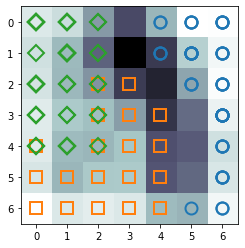

In [83]:
eq = som.quantization_error(X)
et = som.topographic_error(X)
size = 7
W = som.get_weights()

plt.imshow(som.distance_map().T, cmap='bone_r')
markers = {'Iris-setosa': 'o', 'Iris-versicolor': 's', 'Iris-virginica': 'D'}
colors = {'Iris-setosa': 'C0', 'Iris-versicolor': 'C1', 'Iris-virginica': 'C2'}

for i, x in enumerate(X):
    w = som.winner(x)
    marker = markers[y[i]]
    color = colors[y[i]]
    plt.plot(w[0], w[1], marker, markerfacecolor='None',
             markeredgecolor=color, markersize=12, markeredgewidth=2)

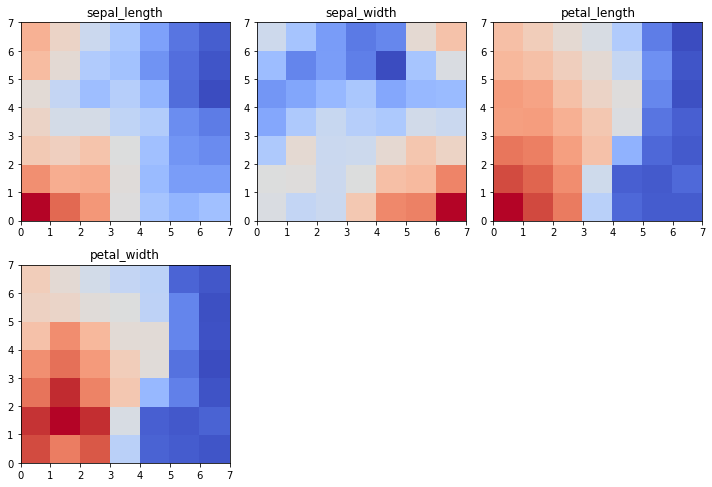

In [84]:
plt.figure(figsize=(10, 10))
for i, f in enumerate(columns[:-1]):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

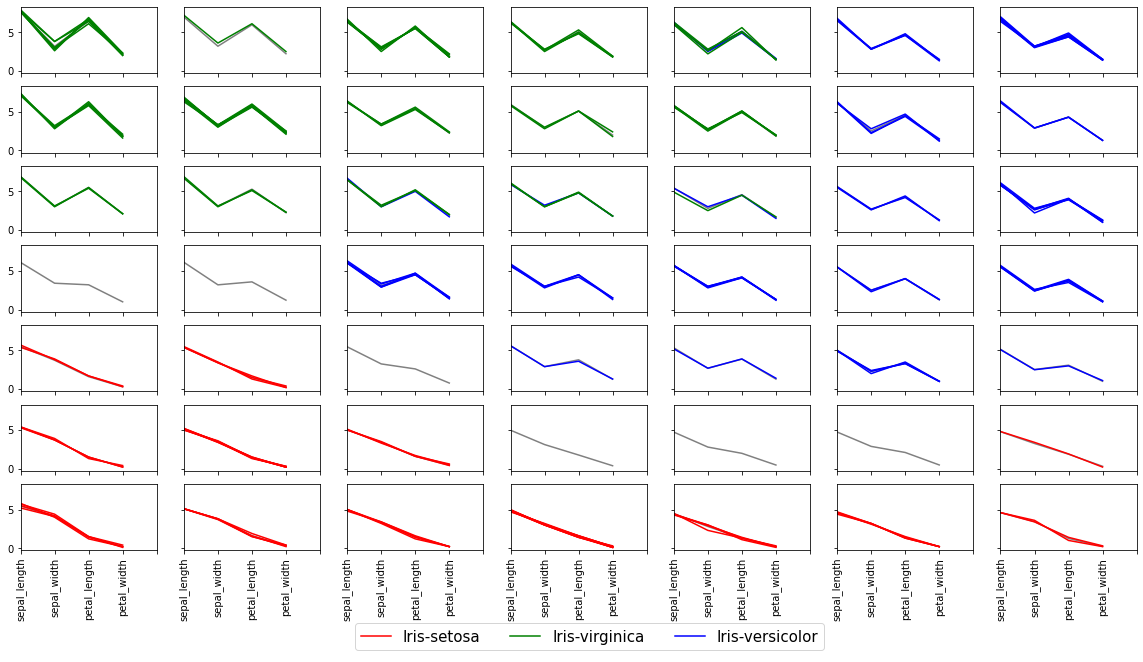

In [85]:
fig, ax = plt.subplots(W.shape[0], W.shape[1], figsize=(20, 10), sharex=True, sharey=True)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        ax[i][j].plot(W[i, j], color='gray')
        ax[i][j].set_xlim(0, 4)
        ax[i][j].set_xticklabels({v: i for i, v in enumerate(columns[:-1])}, rotation=90)
        

colors = {"Iris-setosa": "red", "Iris-virginica": "green", "Iris-versicolor": "blue"}
for i, v in enumerate(X):
    winner = som.winner(v)
    ax[winner[0]][winner[1]].plot(v, color=colors[df.iloc[i, -1]])
    

laxe = fig.add_axes([0.27, -0.02, 0.5, 0.05])
for k, v in colors.items():
    laxe.plot([], c=v, label=k)
laxe.legend(loc='center', ncol=len(colors.keys()), fontsize=15)
laxe.axis('off')

(-1.0, 7.0)

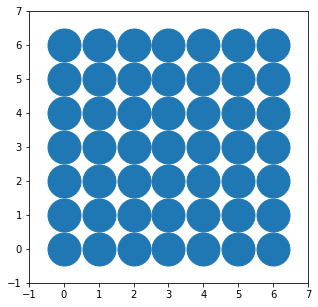

In [13]:
Z = np.zeros((size, size))

plt.figure(figsize=(5, 5))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j], [i], color='C'+str(feature),
                 marker='o', markersize=33)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(columns[:-1])]

plt.xlim([-1, size])
plt.ylim([-1, size])

In [ ]:
map_labels = som.labels_map(X, targ_names)
colors = {0: "red", 1: "green", 2: "blue"}

plt.figure(figsize=(10, 10))
for p, countries in map_labels.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, c, color=colors[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(X.shape[1]))
plt.yticks(np.arange(X.shape[1]))
plt.grid()

# legend_elements = [Patch(facecolor=clr,
#                          edgecolor='w',
#                          label=l) for l, clr in category_color.items()]
# plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()